## Linear Regression
#### Gavin Daves, Rice University
#### INDE 577, Dr. Randy Davila

In this notebook, we will build a Linear Regression Single Neuron Model in Python and then use it on the Spotify dataset.

In [57]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sns.set_theme()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [58]:
# Loading the data

# Add the top-level directory to the system path
sys.path.append('../../')

# Load the data
import clean_data as sd

df = sd.get_df()

# Make a subset of the data that only contains The Beatles
beatles = df[df['artists'] == 'The Beatles']

In [59]:
class RegressionNeuron(object):
    """
    A class used to represent a single artificial regression neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
        
    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.
        
    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 
        
    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha=0.005, epochs=50):
        self.w_ = np.random.rand(1 + X.shape[1])  # Initialize weights
        self.errors_ = []
        N = len(X)

        for _ in range(epochs):
            self.errors_.append(mean_squared_error(y, np.dot(X, self.w_[:-1]) + self.w_[-1]))
            
            # Compute the predictions
            y_pred = np.dot(X, self.w_[:-1]) + self.w_[-1]
            
            # Compute derivatives
            
            dw = -2/N * np.dot(X.T, y - y_pred)
            db = -2/N * np.sum(y - y_pred)
                
            
            # Update the weights
            self.w_[:-1] -= alpha * dw
            self.w_[-1] -= alpha * db

            if np.linalg.norm(dw) < 1e-3:
                break
    
            

            if np.linalg.norm(dw) < 1e-3:
                break

        return self

    def predict(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

In [60]:
def linear_activation(z):
    return z

### Background

Let's revisit the Linear Regression problem we looked at in the Gradient Descent Notebook. Let's build the model and do some analysis on its performance:

In [61]:
beatles = df[df['artists'] == 'The Beatles']

# Scale energy by 100

X = beatles['loudness'].values.reshape(-1, 1)
y = 100*beatles['energy'].values
X_train = np.hstack([X, np.ones((len(X), 1))])

node = RegressionNeuron(linear_activation)
node.train(X_train, y, alpha=.005, epochs = 10000)

0.5142532483018794
178.93876382765234


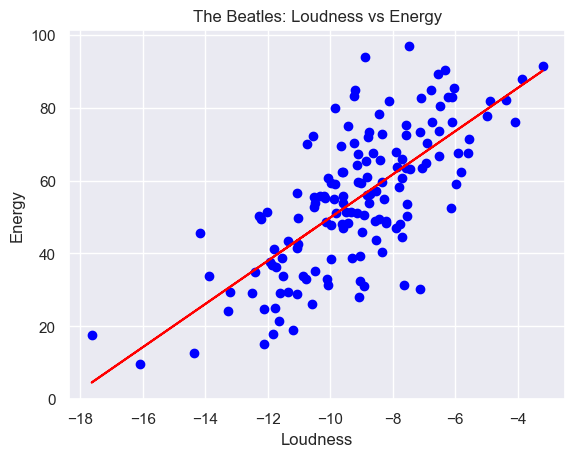

In [62]:
# Plotting the data

plt.scatter(X, y, color = 'blue')
plt.plot(X, node.predict(X_train), color = 'red')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('The Beatles: Loudness vs Energy')
plt.show()

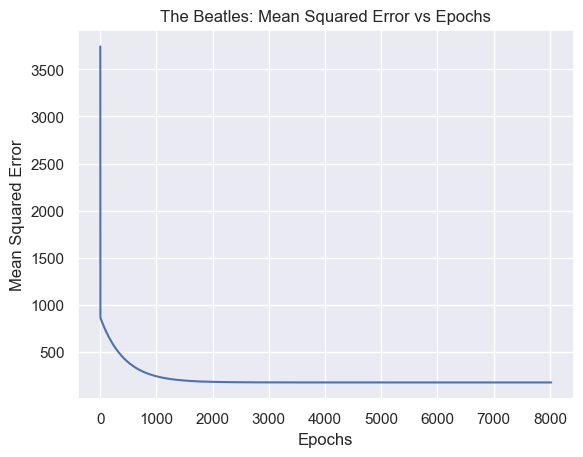

In [63]:
# Plot the MSE over the epochs
plt.plot(range(1, len(node.errors_) + 1), node.errors_)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('The Beatles: Mean Squared Error vs Epochs')
plt.show()

In [64]:
print("MSE: ", mean_squared_error(y, node.predict(X_train)))
print("R-squared score: ", r2_score(y, node.predict(X_train)))

R-squared score:  0.5142532483018794
MSE:  178.93876382765234


### Error Analysis

As we can see, the gradient descent approach to Linear Regression does converge and finds weights that locally minimize the MSE. However, the MSE is still a bit high, and by looking at the graph, it seems that there could be a better fit to the model. However, that is the whole point of gradient descent: it merely finds a local minimum.

From the R-squared score, we can tell that the model is adequate, but still could be improved quite a bit in terms of explaining the variance in the data.